In [52]:
import numpy as np


In [53]:
result_org = -(10/16 * np.log2(10/16)) - (6/16 * np.log2(6/16))
result_org

0.954434002924965

In [54]:
# R1 영역
result1 = (8/16) * -((7/8 * np.log2(7/8)) + (1/8) * np.log2(1/8))
result2 = (8/16) * -((5/8 * np.log2(5/8)) + (3/8) * np.log2(3/8))

result_split = result1 + result2
result_split

0.7489992230622807

In [55]:
# 따라서 정보획득량은
print(result_org - result_split)
# 0.20543477986268432

0.20543477986268432


In [56]:
# 전체 데이터에 대한 Entropy
result = -((9/14) * np.log2(9/14) + (5/14) * np.log2(5/14))
print(result)
# 0.9402859586706311

0.9402859586706311


In [57]:
result_wind_weak = 8/14 * (-6/8 * np.log2(6/8) - 2/8 * np.log2(2/8))
result_wind_strong = 6/14 * (-3/6 * np.log2(3/6) - 3/6 * np.log2(3/6))

result_wind = result_wind_weak + result_wind_strong
print(result_wind)
# 0.8921589282623617

0.8921589282623617


In [58]:
# (전체 엔트로피 - 특정데이터로 분류했을 때 엔트로피) 는 클수록 좋음
# 전체데이터를 Wind로 분류했을때 우리가 얻을 수 있는 정보량은
print(f'wind : {result - result_wind}')   # 0.048

# 전체데이터를 outlook으로 분류했을 때 우리가 얻을 수 있는 정보량
result_out_sunny = 5/14 * (-2/5 * np.log2(2/5) - 3/5 * np.log2(3/5))
result_out_overcast = 4/14 * (-1 * np.log2(1))
result_out_rain = 5/14 *  (-3/5 * np.log2(3/5) - 2/5 * np.log2(2/5))

result_out = result_out_overcast + result_out_sunny + result_out_rain

print(f'out : {result - result_out}')
# 전체데이터를 습도로 분류했을 때 우리가 얻을 수 있는 정보량
result_high = 7/14 * (-3/7 * np.log2(3/7) - 4/7 * np.log2(4/7))
result_norm = 7/14 * (-6/7 * np.log2(6/7) - 1/7 * np.log2(1/7))

result_hum = result_high + result_norm
print(f'hum : {result - result_hum}')

wind : 0.04812703040826949
out : 0.24674981977443933
hum : 0.15183550136234159


In [59]:
# 이런 Decision Tree를 사용하려면 어떻게 해야 하나요?
# sklearn을 이용해서 사용하면 되요!

# Iris 예제를 이용해서 Decision Tree를 구현해 보아요!
# 컬럼을 2개만 사용할께요. 꽃받침의 길이와 꽃잎의 길이만 사용할께요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target','sepal_width', 'petal_width'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

0.9333333333333333


<AxesSubplot:>

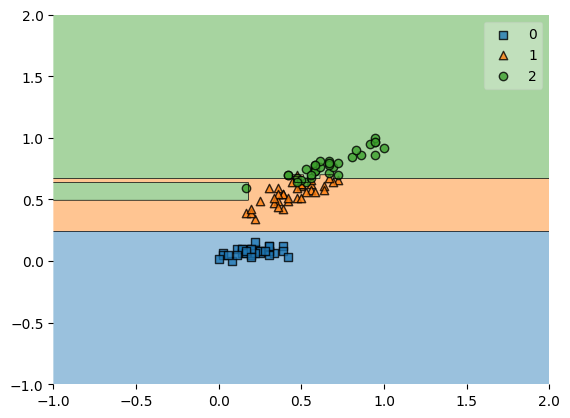

In [61]:
model = DecisionTreeClassifier()
model.fit(x_data_train_norm,t_data_train)
#evaluation
print(accuracy_score(t_data_test,model.predict(x_data_test_norm)))
#시각화
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)

In [62]:
# 우리가 했던 데이터중에 MNIST Data가 있어요!
# 이 데이터셋을 이용해서 다중분류작업을 수행해 볼꺼예요!
# 3가지로 구현해 볼꺼예요!

# 1. Regression을 이용해서 구현(Tensorflow로 구현)
# 2. SVM을 이용해서 구현(sklearn으로 구현) - GridSearchCV 활용
# 3. DecisionTree를 이용해서 구현!

# 각 모델의 정확도는 어떻게 되는지 비교해보아요!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
df = pd.read_csv('train.csv')

x_data = df.drop('label',axis=1, inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

keras_model = Sequential()
keras_model.add(Flatten(input_shape = (784,)))
keras_model.add(Dense(units = 10,
                      activation = 'softmax'))
keras_model.compile(optimizer = Adam(learning_rate=3e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics = ['acc'])
keras_model.summary()

history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs = 100,
                          verbose = 1,
                          validation_split = 0.2,
                          batch_size=100
                          )


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
236/236 [==============================] - 1s 3ms/step - loss: 1.4792 - acc: 0.6341 - val_loss: 0.9733 - val_acc: 0.8073
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.7947 - acc: 0.8331 - val_loss: 0.6700 - val_acc: 0.8568
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6011 - acc: 0.8634 - val_loss: 0.5489 - val_acc: 0.8726
Epoch 4/100
236/236 [==============================] - 1s 2ms/step - loss: 0.5101 - acc: 0.8760 - val_loss: 0.4829 

In [65]:
print(f'케라스모델 : {keras_model.evaluate(x_data_test_norm,t_data_test)}')


394/394 [==============================] - 0s 345us/step - loss: 0.2817 - acc: 0.9210
케라스모델 : [0.2817414700984955, 0.9210317730903625]


In [66]:
# param_grid = [{
#     'kernel': ['linear'],
#     'C': [0.1, 0.5, 10, 100]
# },{
#     'kernel': ['rbf'],
#     'C': [0.1, 0.5, 10, 100],
#     'gamma': [0.001, 0.01, 0.1]
# }]
# svm_model = SVC()

# grid_search = GridSearchCV(svm_model, #튜닝할 모델
#                            param_grid, #하이퍼파라미터들의 값을 딕셔너리로 지정
#                            cv=5, #교차 검증을 몇겹으로 할지 결정
#                            scoring='accuracy', #모델의 성능을 측정할 지표 지정
#                            verbose=1) # 실행과정 출력여부

# grid_search.fit(x_data_train_norm,
#                 t_data_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)



In [67]:
# svm_model = SVC()
# svm_model.fit(x_data_train_norm,t_data_train)
# print(accuracy_score(t_data_test,svm_model.predict(x_data_test_norm)))

In [68]:
# 클래스가 많으면 정확도 낮음
# 피쳐가 연속적인 숫자값일 때도 약함
tree_model = DecisionTreeClassifier()
tree_model.fit(x_data_train_norm,t_data_train)
#evaluation
print(accuracy_score(t_data_test,tree_model.predict(x_data_test_norm)))

0.8533333333333334


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_data_train_norm,t_data_train)
knn_model_result = accuracy_score(t_data_test,knn_model.predict(x_data_test_norm))
print(knn_model_result)

0.9637301587301588


In [1]:
import tensorflow as tf
tf.__version__
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()
# GPU 디바이스 목록 얻기
tf.config.list_physical_devices('GPU')

# 특정 GPU만 사용하도록 설정
#tf.config.experimental.set_visible_devices(physical_devices[1], 'GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]